# Load libraries


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min, norm, geom, uniform, lognorm

In [2]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/week_02_tutorial


# Import data


In [3]:
# Load input data, inflow-driven model:
# and check your data

file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="inflow_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    0 non-null      float64
 2   inflow   61 non-null     int64  
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# set the index to year
data = data.set_index(["year"])

# define useful variables
years = data.index
end_year = years[-1]
print(f"end_year = {end_year}")

data

end_year = 2050


,stock,inflow,outflow
year,,,
1990,NaN,13,NaN
1991,NaN,14,NaN
1992,NaN,12,NaN
1993,NaN,10,NaN
1994,NaN,7,NaN
...,...,...,...
2046,NaN,66,NaN
2047,NaN,67,NaN
2048,NaN,70,NaN


In [5]:
data_length = data.shape[0]
timesteps = np.arange(0, data_length)

**Questions:**

1. What does `timesteps` refer to?
2. What is the value `data_length`?


**ANSWERS**


...


# Survival curve


For now, just use the code below. We will dive into survival curves later on in the `week_2_survival_curves.ipynb` notebook.


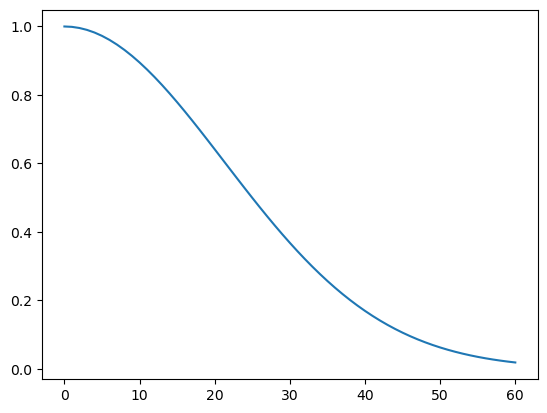

In [6]:
# Weibull distribution
survival_curve = weibull_min.sf(timesteps, c=2, loc=0, scale=30)

plt.plot(survival_curve)
plt.show()

# Survival curve matrix


![shifted_survival_curve](../img/shifted_survival_curve.png)


In [ ]:
# create survival curve matrix filled with zeros
survival_curve_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populate that matrix
for step in timesteps:
    # at each iteration, we shift the survival curve
    shifted_survival_curve = survival_curve[0 : data_length - step]
    # and we fill the survival curve matrix with the shifted survival curve
    survival_curve_matrix.loc[step:data_length, step] = shifted_survival_curve

survival_curve_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,0.077305,0.085911,...,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.00000,0.0
57,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,0.077305,...,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.00000,0.0
58,0.023807,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,...,0.947011,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.00000,0.0
59,0.020905,0.023807,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,...,0.931358,0.947011,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.00000,0.0


# Flow driven model


![flow_driven_equations](../img/flow_driven_equations.png)


In [ ]:
# This is our first model input
inflows = data["inflow"]
inflows

year
1990    13
1991    14
1992    12
1993    10
1994     7
        ..
2046    66
2047    67
2048    70
2049    77
2050    80
Name: inflow, Length: 61, dtype: int64

In [9]:
# And this is our second model input
survival_curve_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,0.077305,0.085911,...,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.000000,0.00000,0.0
57,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,0.077305,...,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.000000,0.00000,0.0
58,0.023807,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,0.069406,...,0.947011,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.000000,0.00000,0.0
59,0.020905,0.023807,0.027052,0.030671,0.034697,0.039164,0.044108,0.049566,0.055576,0.062177,...,0.931358,0.947011,0.960789,0.972604,0.982379,0.990050,0.995565,0.998890,1.00000,0.0


## Cohort matrix


**Question:**

3. What is the difference between the Survival Curve Matrix and the Cohort Matrix?


tips:

![filling_flow_driven_cohort_matrix](../img/filling_flow_driven_cohort.png)


**ANSWER**


...


In [10]:
# We create the cohort_matrix filled with zeros
cohort_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# And we populate it
for step in timesteps:
    # we scale the shifted survival curve with the inflow of the step-th year
    cohort_matrix.loc[:, step] = survival_curve_matrix.loc[:, step] * inflows.iloc[step]

cohort_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,12.985564,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,12.942350,13.984453,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,12.870648,13.937916,11.986674,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,12.770931,13.860698,11.946785,9.988895,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.398720,0.485754,0.469967,0.441081,0.346964,1.111524,1.367884,1.596345,2.164533,2.577327,...,64.191895,62.872276,64.353239,69.689579,64.927818,66.000000,0.000000,0.000000,0.000000,0.0
57,0.351674,0.429391,0.416360,0.391639,0.308757,0.991326,1.222677,1.430060,1.943376,2.319142,...,63.412103,62.246687,63.854655,69.303488,64.711752,65.926707,67.000000,0.000000,0.000000,0.0
58,0.309490,0.378726,0.368050,0.346967,0.274147,0.882163,1.090458,1.278253,1.740943,2.082189,...,62.502734,61.490524,63.219291,68.766552,64.353239,65.707318,66.925597,70.000000,0.000000,0.0
59,0.271762,0.333297,0.324622,0.306708,0.242877,0.783278,0.970379,1.140025,1.556134,1.865296,...,61.469655,60.608712,62.451314,68.082313,63.854655,65.343289,66.702883,69.922265,77.000000,0.0


**Question:**

4. What is the length difference between `survival_curve_matrix.loc[:, step]` above and the `shifted_survival_curve` from cell 7? Why does that not change anything for our calculation?


**ANSWER**


...


<Axes: xlabel='year', ylabel='year'>

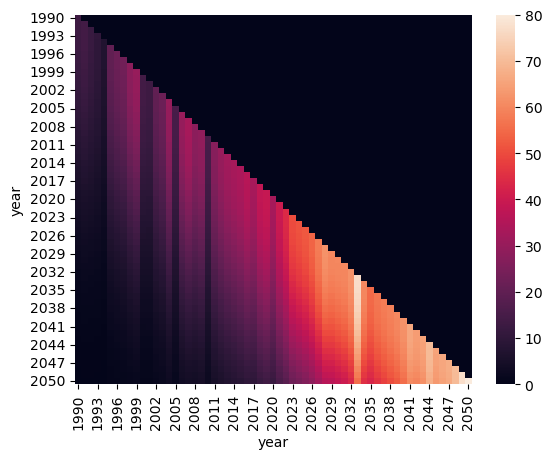

In [11]:
# set index and columns to actual years instead of timesteps
cohort_matrix.index = years
cohort_matrix.columns = years

# and visualize the cohort_matrix matrix with a heatmap
sns.heatmap(cohort_matrix, annot=False)

**Questions:**

5. What do the rows and columns of the Cohort matrix represent?


**ANSWERS**


...


## Stocks


$$
\begin{align}
\text{stock}(y) &= \sum_{t=0}^{y}{ \Bigl( \text{inflow}(t) \times \text{surv}(y-t)  \Bigr) } \\
&= \sum_{t=0}^{y}{\text{cohort}(t)}
\end{align}
$$


**Question:**

6. Using the formula above, calculate the stock time series

Tips: check the **Mean, sum, maximum and minimum** section of [Week 1 Pandas refresher](https://github.com/adrien-perello/MFA/blob/main/week_01/code/week_1_pandas_refresher_answers.ipynb)


In [12]:
# ! ANSWER
# stock =

## Net addition to stock


$$\text{NAS}(y) = \text{stock}(y) - \text{stock}(y-1)$$


**Question:**

5. Using the formula above, calculate the net addition to stock time series

Tips: check question 23 and 25 of the [Week 1 Pandas refresher](https://github.com/adrien-perello/MFA/blob/main/week_01/code/week_1_pandas_refresher_answers.ipynb)


In [13]:
# ! ANSWER
# nas =

## Outflows


$$\text{outflow}(y) = \text{inflow}(y) - \text{NAS}(y)$$


**Question:**

7. Using the formula above, calculate the outflow time series


In [14]:
# ! ANSWER
# outflows =

## Putting it together


In [ ]:
data["stock"] = stock
data["outflow"] = outflows
data["nas"] = nas

data

# Visualize the results


In [ ]:
# Plot the evolution of the inflows, outflows and net addition to stock over time
# (on the same graph)

# ! ANSWER

In [ ]:
# Plot the evolution of the stock over time

# ! ANSWER

In [ ]:
# Visualize the stock by cohort_matrixs
cohort_matrix.plot(kind="area", stacked=True, legend=False)

# Export output data to Excel


In [ ]:
# Save the data to an Excel file
# (you may need to create the folder if it doesn't exist)
file_path = BASE_DIR / "data_output" / "week_2_tutorial_myname.xlsx"
data.to_excel(file_path, sheet_name="flow_driven")

In [ ]:
# But we also want to save the cohort_matrix data in the same excel file
# without overwriting the file.
# To do that, we open an Excel file in append mode ('a')
# https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

with pd.ExcelWriter(file_path, mode="a") as writer:
    cohort_matrix.to_excel(writer, sheet_name="cohort_matrix_flow_driven")

# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Pandas excel writer](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)
